In [1]:
# load packages
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

# Waist Shape of Hermite-Gaussian Beam

In [2]:
# simuate the waist of the Normalized Hermite-Gaussian beam of m, n mode
def sim_waist(m, n, extent, num=100):
    w0_x = 1
    m = m
    Hm = special.hermite(m)

    w0_y = 1
    n = n
    Hn = special.hermite(n)

    cmn = 1/(np.pi**(1/4)*np.sqrt(2**m*special.factorial(m)))*1/(np.pi**(1/4)*np.sqrt(2**n*special.factorial(n)))

    xmin, xmax, ymin, ymax = extent
    x, y = np.meshgrid(np.linspace(xmin, xmax, num),np.linspace(ymin, ymax, num))
    xi_x = np.sqrt(2)*x/w0_x
    xi_y = np.sqrt(2)*y/w0_y

    cmno = cmn*np.sqrt(2/w0_x)*np.sqrt(2/w0_y)

    u = cmno*Hm(xi_x)*Hn(xi_y)*np.exp(-xi_x**2/2)*np.exp(-xi_y**2/2)
    
    return x, y, u

**Simulate the waist shape of each mode**

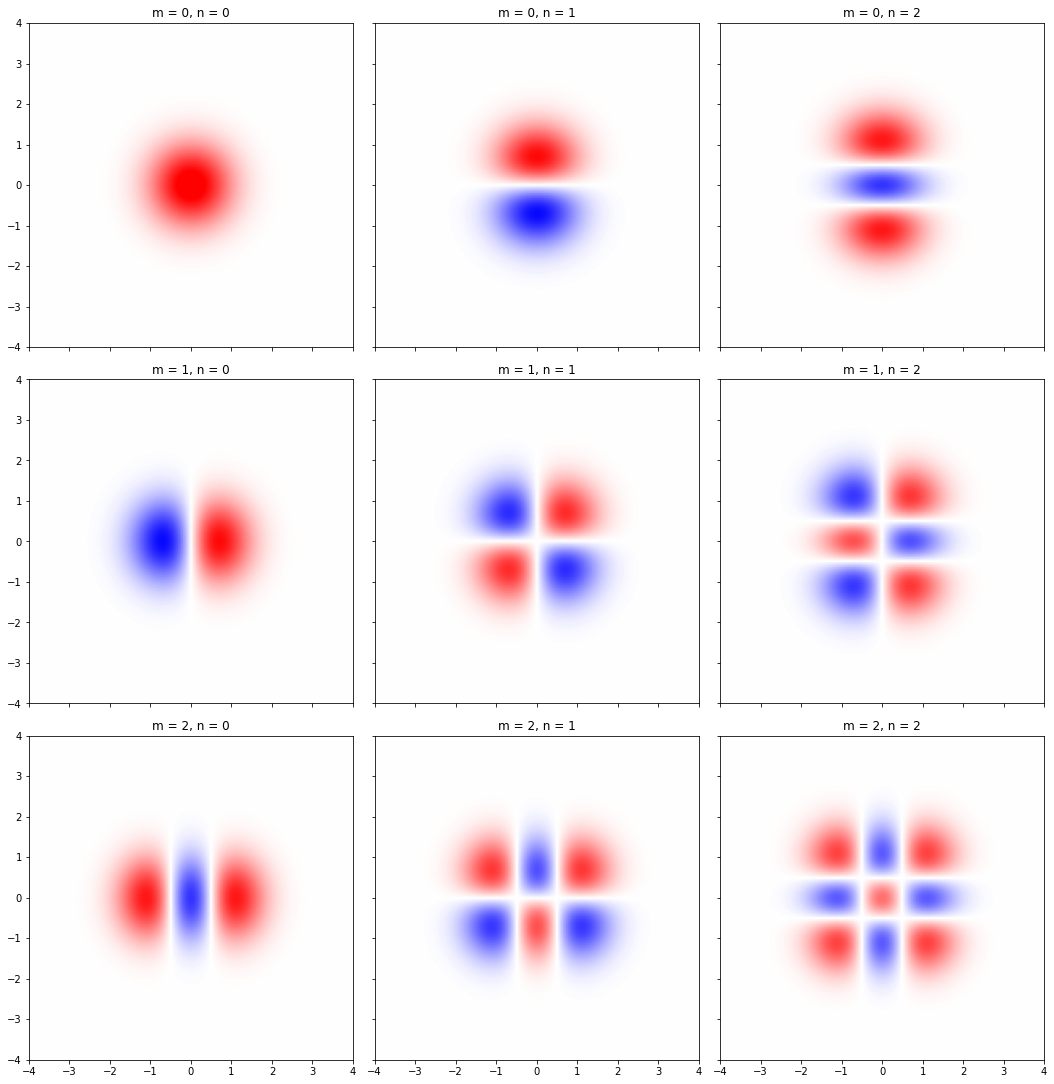

In [3]:
mmax, nmax = 2, 2
extent = [-4,4,-4,4]

fig, axes = plt.subplots(mmax+1, nmax+1, figsize=(16,16), sharex=True, sharey=True)
for m in np.arange(0,mmax+1):
    for n in np.arange(0,nmax+1):
        x, y, u = sim_waist(m, n, extent, num=200)
        axes[m,n].imshow(u, extent=extent, vmax=1, vmin=-1, cmap=plt.cm.get_cmap('bwr'), origin='lower')
        axes[m,n].set_title(f'm = {m}, n = {n}')
        axes[m,n].margins(0,0)
fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05, wspace=0.0, hspace=0.1)

fig.savefig('../picture/res/hgbeam/waist_of_hermite_gaussian_modes.png')
        
plt.show()

**Simulate the combination of some Hermite-Gaussian modes**

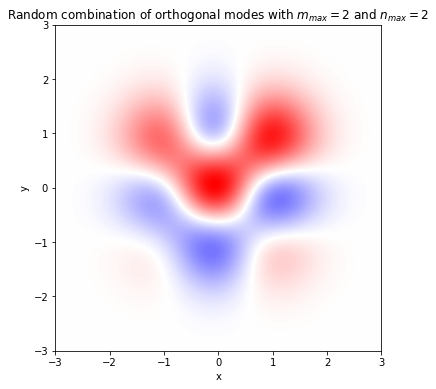

In [4]:
mmax, nmax = 2, 2
extent = [-3,3,-3,3]

np.random.seed(2021315)

scale = np.random.randn(mmax+1,nmax+1)
scale = scale/np.linalg.norm(scale.reshape(-1), 2)

s = 0
for m in np.arange(0,mmax+1):
    for n in np.arange(0,nmax+1):
        x, y, u = sim_waist(m, n, extent, 1000)
        s = s + u*scale[m,n]

fig, ax = plt.subplots(1,1,figsize=(6,6))
vm = np.max([np.max(s), -np.min(s)])
ax.imshow(s, extent=extent, vmax=vm, vmin=-vm, cmap=plt.cm.get_cmap('bwr'), origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Random combination of orthogonal modes with $m_{max} = %d$ and $n_{max} = %d$'%(mmax, nmax))

fig.savefig('../picture/res/hgbeam/random_comb_hermite_gaussian.png')

plt.show()

# Waist Intensity of Hermite-Gaussian mode

In [5]:
# get the waist intensity of the Normalized Hermite-Gaussian beam of m, n mode
def get_waist_intensity(m, n):
    w0_x = 1
    m = m
    Hm = special.hermite(m)

    w0_y = 1
    n = n
    Hn = special.hermite(n)
    
    cmn = 1/(np.pi**(1/4)*np.sqrt(2**m*special.factorial(m)))*1/(np.pi**(1/4)*np.sqrt(2**n*special.factorial(n)))
    cmno = cmn*np.sqrt(2/w0_x)*np.sqrt(2/w0_y)
    
    return cmno*Hm(0)*Hn(0)

**plot the waist intensity of the Normalized Hermite-Gaussian (m,n)**

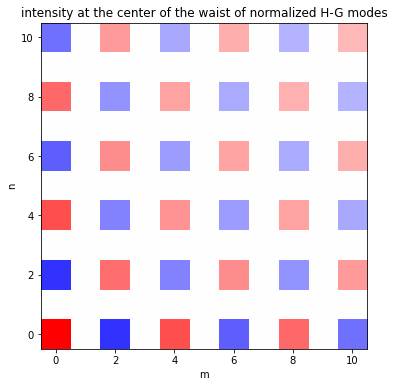

In [6]:
mmax, nmax = 10, 10
ms = np.arange(0,mmax+1)
ns = np.arange(0,nmax+1)

H = np.zeros((mmax+1, nmax+1))
for m in ms:
    for n in ns:
        H[m, n] = get_waist_intensity(m, n)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.imshow(H, origin='lower', cmap=plt.cm.get_cmap('bwr'), vmax = 1, vmin=-1)
ax.set_xlabel('m')
ax.set_ylabel('n')
ax.set_title('intensity at the center of the waist of normalized H-G modes')

fig.savefig('../picture/res/hgbeam/intensity_center_waist_normalized_hg.png')
        
plt.show()